# Brief Qualité de l'air en Bretagne

## Imporation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# lecture du dataset
data = pd.read_csv('ind_bretagne_agglo.csv')
data

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_17767545e09_12e0,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_17767545e09_12e1,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_17767545e09_12e2,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_17767545e09_12e3,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_17767545e09_12e4,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd4,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148),#99E600
2543,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd5,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600
2544,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd6,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200042174,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848),#99E600
2545,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd7,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687),#99E600


## Traitement

In [3]:
# suppression de la partie heure se trourvant avec la date
data['date_ech_m'] = data['date_ech']
for item in data['date_ech']:
    data['date_ech'] = data['date_ech'].replace(item, item[:10])
    data['date_ech_m'] = data['date_ech_m'].replace(item, item[:7])

In [4]:
data

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,date_ech_m
0,ind_bretagne_agglo.fid--15c6355_17767545e09_12e0,2021-01-01,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,2021-01
1,ind_bretagne_agglo.fid--15c6355_17767545e09_12e1,2021-01-01,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,2021-01
2,ind_bretagne_agglo.fid--15c6355_17767545e09_12e2,2021-01-01,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,2021-01
3,ind_bretagne_agglo.fid--15c6355_17767545e09_12e3,2021-01-01,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,2021-01
4,ind_bretagne_agglo.fid--15c6355_17767545e09_12e4,2021-01-01,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd4,2020-01-01,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148),#99E600,2020-01
2543,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd5,2020-01-01,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600,2020-01
2544,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd6,2020-01-01,3,Bon,Air Breizh,EPCI,200042174,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848),#99E600,2020-01
2545,ind_bretagne_agglo.fid--15c6355_17767545e09_1cd7,2020-01-01,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687),#99E600,2020-01


### Groupement par date

#### Groupement par jours

In [5]:
# groupement par jours
data_date = data.groupby(['date_ech']).mean()
data_date

,valeur,code_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
date_ech,,,,,,,
2020-01-01,3.000000,2.185927e+08,1.857143,0.0,2.571429,2.428571,0.0
2020-01-02,3.142857,2.185927e+08,1.571429,0.0,2.857143,2.428571,0.0
2020-01-03,3.428571,2.185927e+08,1.571429,0.0,3.428571,2.857143,0.0
2020-01-04,3.142857,2.185927e+08,2.000000,0.0,2.428571,3.142857,0.0
2020-01-05,4.000000,2.185927e+08,2.000000,0.0,2.714286,3.857143,0.0
...,...,...,...,...,...,...,...
2020-12-28,3.285714,2.185927e+08,1.000000,0.0,3.285714,2.142857,0.0
2020-12-29,3.000000,2.185927e+08,1.142857,0.0,3.000000,2.142857,0.0
2020-12-30,2.857143,2.185927e+08,1.428571,0.0,2.857143,1.571429,0.0


In [6]:
# traitmenent de certaine collones pour le graph qualité air par jours
val = data_date['valeur']
val_no2 = data_date['val_no2']
val_o3 = data_date['val_o3']
val_pm10 = data_date['val_pm10']

#### Groupement par mois

In [7]:
# groupe par date
data_date_m = data.groupby(['date_ech_m']).mean()

In [8]:
# traitment pour le qraph qualité air par mois
val_m = data_date_m['valeur']
val_no2_m = data_date_m['val_no2']
val_o3_m = data_date_m['val_o3']
val_pm10_m = data_date_m['val_pm10']

### Groupement par region et date

In [9]:
# groupement par region
data_zone = data.groupby(['lib_zone', 'date_ech_m']).mean()

In [10]:
# traitement pour le graph qualité air par region
lst_val_bm = []
lst_val_mv = []
lst_val_lo = []
lst_val_bo = []
lst_val_sb = []
lst_val_sm = []
lst_val_rm = []
for item in data_zone.index:
    if 'Brest Métropole' in item:
        lst_val_bm.append(data_zone['valeur'].loc[item])
    elif 'CA Golfe du Morbihan - Vannes' in item:
        lst_val_mv.append(data_zone['valeur'].loc[item])
    elif 'CA Lorient' in item:
        lst_val_lo.append(data_zone['valeur'].loc[item])
    elif 'CA Quimper Bretagne Occidentale' in item:
        lst_val_bo.append(data_zone['valeur'].loc[item])
    elif 'CA Saint-Brieuc Armor' in item:
        lst_val_sb.append(data_zone['valeur'].loc[item])
    elif 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)' in item:
        lst_val_sm.append(data_zone['valeur'].loc[item])
    else:
        lst_val_rm.append(data_zone['valeur'].loc[item])

In [11]:
# traitement pour le graph pm10 par region
lst_val_pm10_bm = []
lst_val_pm10_mv = []
lst_val_pm10_lo = []
lst_val_pm10_bo = []
lst_val_pm10_sb = []
lst_val_pm10_sm = []
lst_val_pm10_rm = []
for item in data_zone.index:
    if 'Brest Métropole' in item:
        lst_val_pm10_bm.append(data_zone['val_pm10'].loc[item])
    elif 'CA Golfe du Morbihan - Vannes' in item:
        lst_val_pm10_mv.append(data_zone['val_pm10'].loc[item])
    elif 'CA Lorient' in item:
        lst_val_pm10_lo.append(data_zone['val_pm10'].loc[item])
    elif 'CA Quimper Bretagne Occidentale' in item:
        lst_val_pm10_bo.append(data_zone['val_pm10'].loc[item])
    elif 'CA Saint-Brieuc Armor' in item:
        lst_val_pm10_sb.append(data_zone['val_pm10'].loc[item])
    elif 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)' in item:
        lst_val_pm10_sm.append(data_zone['val_pm10'].loc[item])
    else:
        lst_val_pm10_rm.append(data_zone['val_pm10'].loc[item])

#### Groupement par region

In [12]:
# groupement par region
data_zone_p = data.groupby(['lib_zone']).mean()
data_zone_p

,valeur,code_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
lib_zone,,,,,,,
Brest Métropole,3.819945,242900314.0,1.290859,0.0,3.598338,2.916898,0.0
CA Golfe du Morbihan - Vannes,3.723288,200067932.0,1.263014,0.0,3.536986,2.632877,0.0
CA Lorient,3.731507,200042174.0,1.246575,0.0,3.550685,2.687671,0.0
CA Quimper Bretagne Occidentale,3.713115,200068120.0,1.150273,0.0,3.565574,2.655738,0.0
CA Saint-Brieuc Armor,3.660274,200069409.0,1.235616,0.0,3.479452,2.641096,0.0
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,243500782.0,1.181818,0.0,3.479339,3.011019,0.0
Rennes Métropole,3.646409,243500139.0,1.439227,0.0,3.411602,2.748619,0.0


In [13]:
lst_val = []
for ligne in data_zone_p['valeur']:
    lst_val.append(ligne)
    
lst_val_no2 = []
for ligne in data_zone_p['val_no2']:
    lst_val_no2.append(ligne)
    
lst_val_o3 = []
for ligne in data_zone_p['val_o3']:
    lst_val_o3.append(ligne)
    
lst_val_pm10 = []
for ligne in data_zone_p['val_pm10']:
    lst_val_pm10.append(ligne)
    
lst_nom = []
for ligne in data_zone_p.index:
    lst_nom.append(ligne)

In [14]:
lst = []
lst.append(lst_val)
lst.append(lst_val_no2)
lst.append(lst_val_o3)
lst.append(lst_val_pm10)

## Affichage des graph et interpretation

### Graph des groupement par date

#### Graph qualité de l'aire par jours

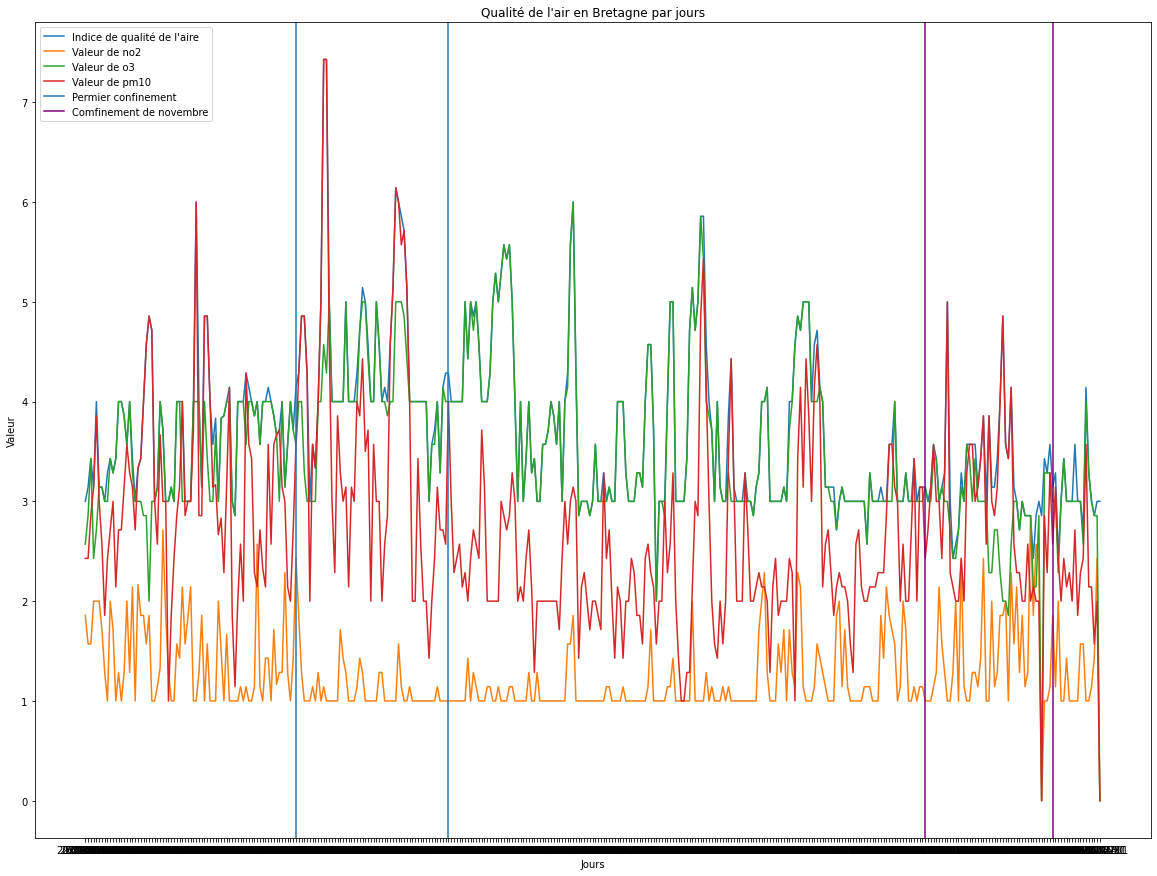

In [15]:
# figure matplotlib qui affiche les taux pour chaque jours du dataset
fig = plt.figure(1, figsize=(20, 15)) # taille de la figure

# valeurs a afficher
plt.plot(val, label='Indice de qualité de l\'aire')
plt.plot(val_no2, label='Valeur de no2')
plt.plot(val_o3, label='Valeur de o3')
plt.plot(val_pm10, label='Valeur de pm10')

# affiche des barre vertivale au date voulue
plt.axvline(x='2020-03-17', label='Permier confinement')
plt.axvline(x='2020-05-11')
plt.axvline(x='2020-10-30', color='purple', label='Comfinement de novembre')
plt.axvline(x='2020-12-15', color='purple')

#afficher le nom des axes
plt.xlabel('Jours')
plt.ylabel('Valeur')

# affiche la legend
plt.legend()

# affiche le titre
plt.title('Qualité de l\'air en Bretagne par jours')

plt.show()

#### Graph qualité de l'aire par mois

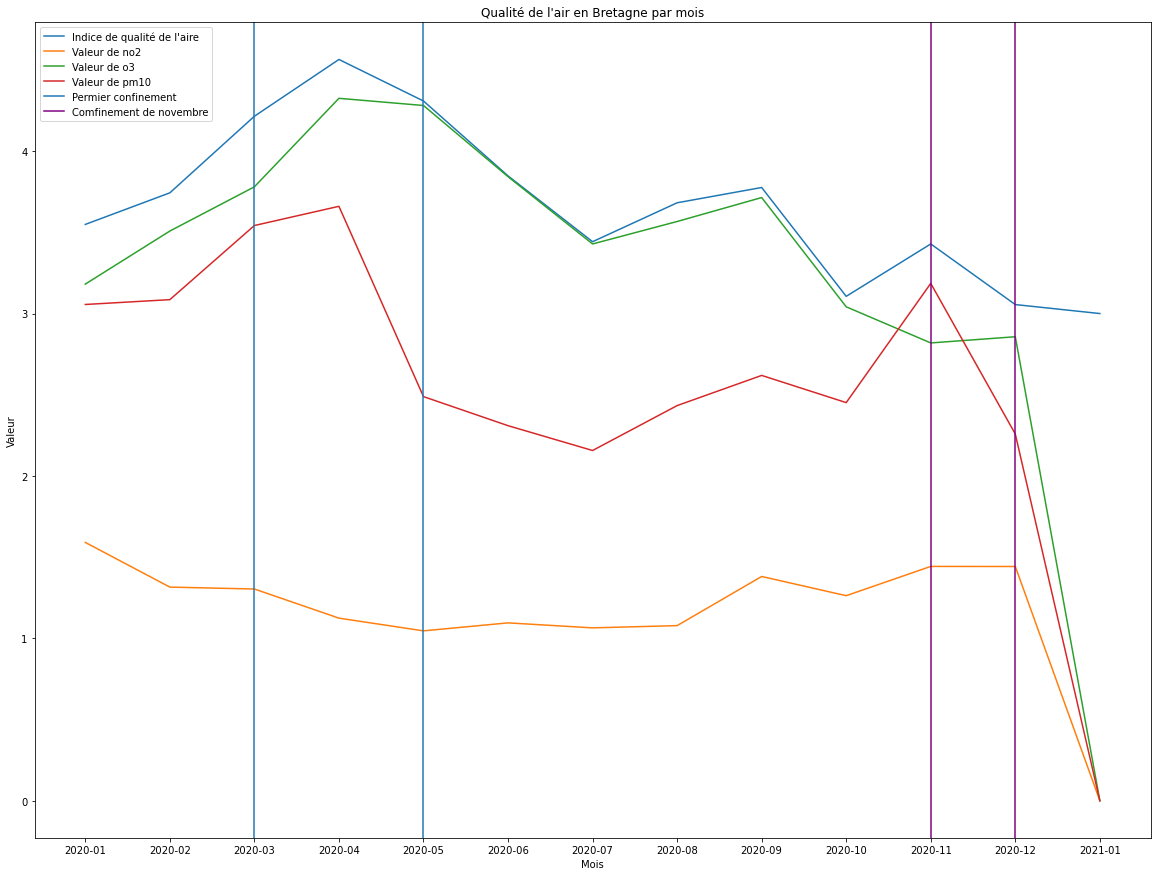

In [16]:
# figure matplotlib qui affiche les taux pour chaque mois du dataset
fig = plt.figure(1, figsize=(20, 15)) # taille de la figure

# valeurs a afficher
plt.plot(val_m, label='Indice de qualité de l\'aire')
plt.plot(val_no2_m, label='Valeur de no2')
plt.plot(val_o3_m, label='Valeur de o3')
plt.plot(val_pm10_m, label='Valeur de pm10')

# affiche des barre vertivale au date voulue
plt.axvline(x='2020-03', label='Permier confinement')
plt.axvline(x='2020-05')
plt.axvline(x='2020-11', color='purple', label='Comfinement de novembre')
plt.axvline(x='2020-12', color='purple')

#afficher le nom des axes
plt.xlabel('Mois')
plt.ylabel('Valeur')

# affiche la legend
plt.legend()

# affiche le titre
plt.title('Qualité de l\'air en Bretagne par mois')

plt.show()

### interpretation des deux graph qualité de l'aire par jours et qualité de l'aire par mois

Le permier graphique représente la qualité de l'aire, la valeur de no2, pm10 et de 03 par jours sur la durée du dataset
Quant au deuxième, il affiche les meme valeurs sur la meme durée mais représenter par mois

Sur les graphs ci dessus on peu voir que pendant le confinement(entre les barres bleu/mauve) il y a une diminution de no2(barre orange) mais une augmentation de pm10(barre rouge), cela est du au fait que la population produit plus de particule fine, du au chauffage et cheminée notament, quand il sont chez eux et produise moins de no2

On remarque aussi que après le premier confinement le taux de no2 reste relativement bas, ce qui peux provenir du fait que la population a pour la plus par continuer a travailler en télétravaille, mais de ce fait le taux de pm10 qui avait diminué, reaugmente


### Graph des groupement par region par date

#### Graph qualité de l'aire par zone par mois

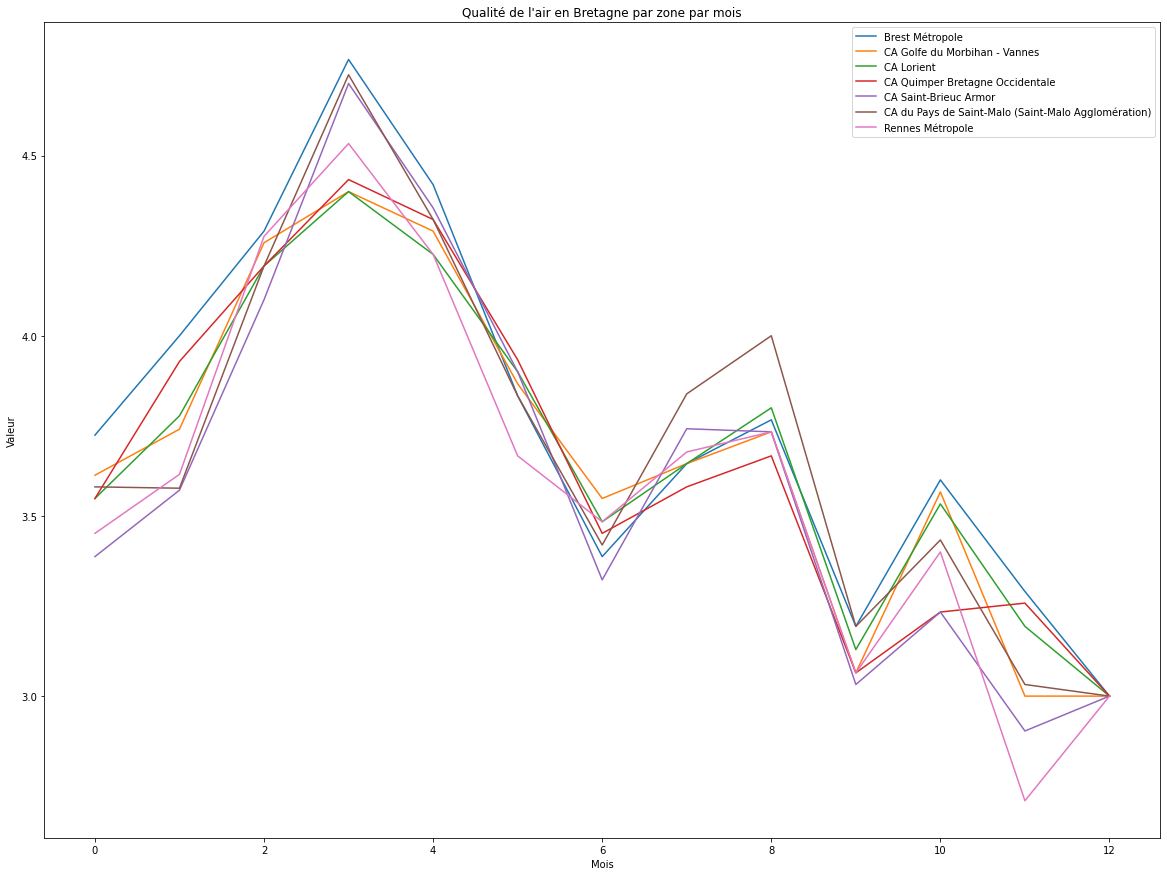

In [17]:
# figure matplotlib qui affiche les taux pour chaque jours du dataset
fig = plt.figure(1, figsize=(20, 15)) # taille de la figure

# valeurs a afficher
plt.plot(lst_val_bm, label='Brest Métropole')
plt.plot(lst_val_mv, label='CA Golfe du Morbihan - Vannes')
plt.plot(lst_val_lo, label='CA Lorient')
plt.plot(lst_val_bo, label='CA Quimper Bretagne Occidentale')
plt.plot(lst_val_sb, label='CA Saint-Brieuc Armor')
plt.plot(lst_val_sm, label='CA du Pays de Saint-Malo (Saint-Malo Agglomération)')
plt.plot(lst_val_rm, label='Rennes Métropole')

#afficher le nom des axes
plt.xlabel('Mois')
plt.ylabel('Valeur')

# affiche la legend
plt.legend()

# affiche le titre
plt.title('Qualité de l\'air en Bretagne par zone par mois')

plt.show()

#### Graph valaur de pm par zone par mois

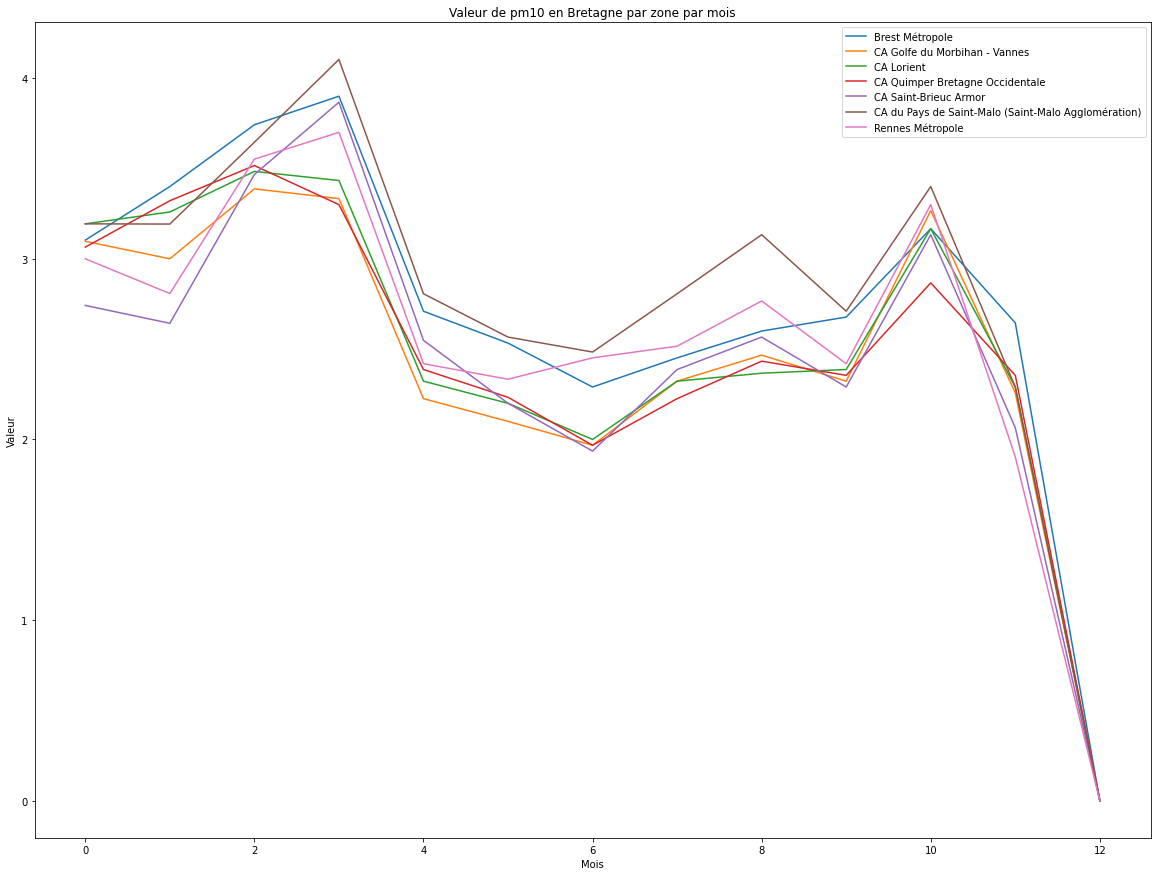

In [18]:
# figure matplotlib qui affiche les taux pour chaque jours du dataset
fig = plt.figure(1, figsize=(20, 15)) # taille de la figure

# valeurs a afficher
plt.plot(lst_val_pm10_bm, label='Brest Métropole')
plt.plot(lst_val_pm10_mv, label='CA Golfe du Morbihan - Vannes')
plt.plot(lst_val_pm10_lo, label='CA Lorient')
plt.plot(lst_val_pm10_bo, label='CA Quimper Bretagne Occidentale')
plt.plot(lst_val_pm10_sb, label='CA Saint-Brieuc Armor')
plt.plot(lst_val_pm10_sm, label='CA du Pays de Saint-Malo (Saint-Malo Agglomération)')
plt.plot(lst_val_pm10_rm, label='Rennes Métropole')

#afficher le nom des axes
plt.xlabel('Mois')
plt.ylabel('Valeur')

# affiche la legend
plt.legend()

# affiche le titre
plt.title('Valeur de pm10 en Bretagne par zone par mois')

plt.show()

#### Interpretation des deux graph qualité de l'air par zone par mois et valeur pm10 par zone par mois

Ce graphique représente la qualité de l'aire par zone géographique pendant la durée du dataset

on y voit que les différente zone de Bretagne on toute en moyenne la meme qualité d'air, et que au file du dataset la qualité de l'aire en bretagne augmante. Une des expliquation et que pedant le confinement l'augmentation de la production de pm10 a fait diminuer la qualité de l'air(Graphique ci-dessus).

### Autre Graph

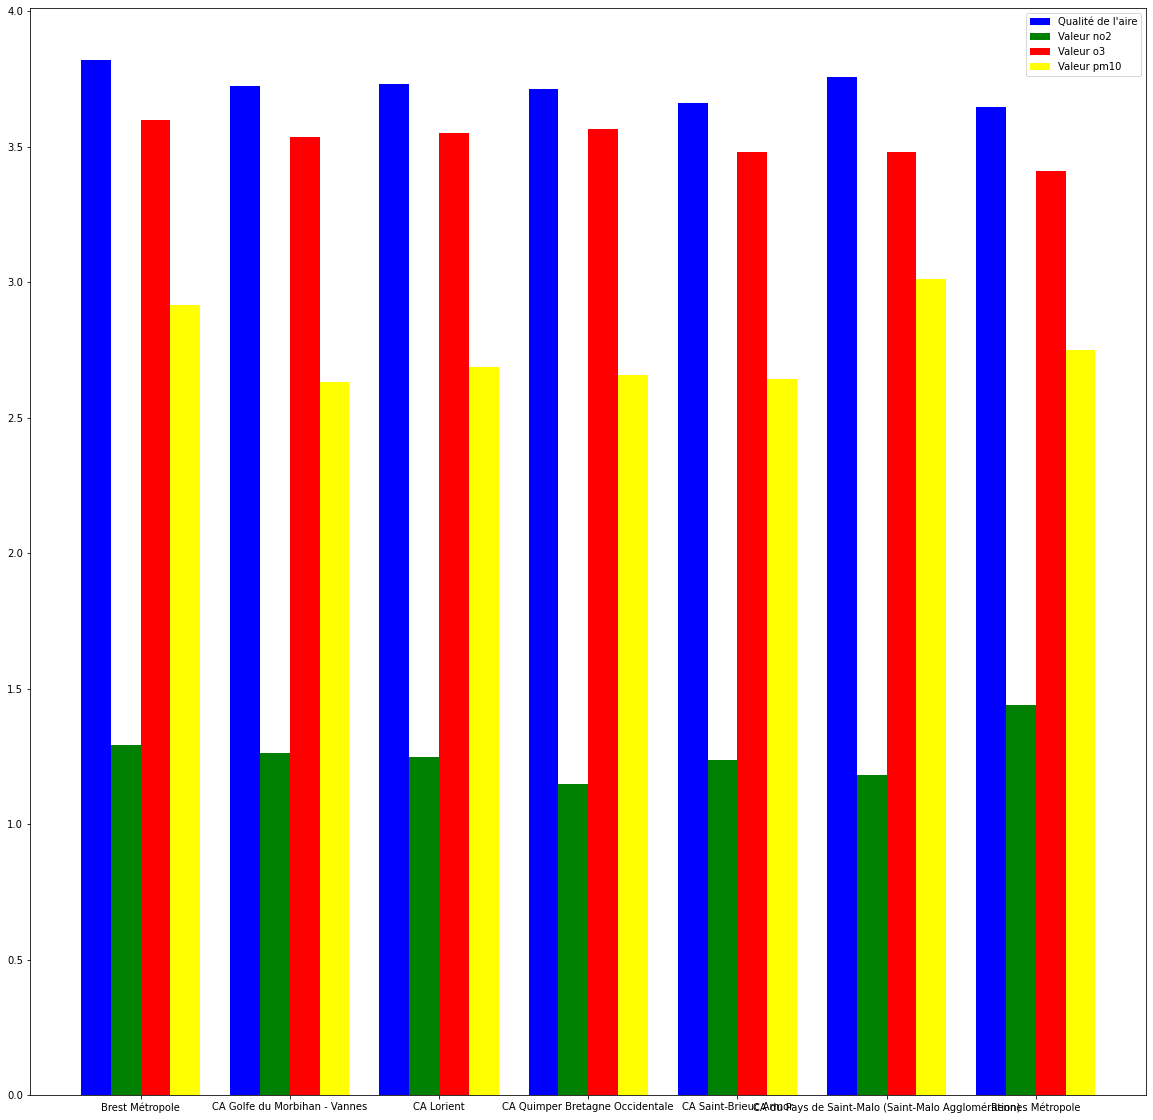

In [19]:
# figure qui affiche les taux par region
fig = plt.figure(1, figsize=(20, 20))

barWidth = 0.2
y1 = lst_val
y2 = lst_val_no2
y3 = lst_val_o3
y4 = lst_val_pm10
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, y1, width = barWidth, color = ['Blue' for i in y1], label='Qualité de l\'aire')
plt.bar(r2, y2, width = barWidth, color = ['Green' for i in y1], label='Valeur no2')
plt.bar(r3, y3, width = barWidth, color = ['Red' for i in y1], label='Valeur o3')
plt.bar(r4, y4, width = barWidth, color = ['Yellow' for i in y1], label='Valeur pm10')
plt.xticks([r + barWidth + 0.1 for r in range(len(y1))], lst_nom)

plt.legend()

Sur ce graphique on compare la qulité de l'air par zone de Bretagne, c'est une moyenne sur toute la durée du dataset